In [1]:
#Dataset  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# New Section

In [2]:
# read csv file
df = pd.read_csv("/content/drive/MyDrive/data file/creditcard (1).csv")

In [3]:
# show first 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# to check how many records
# to check how many entry 
df.shape

(284807, 31)

In [5]:
# to check null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# check the data types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# select dataset for input and output
X = df.drop("Class",axis = 1) # input varaible
Y = df["Class"] #output

In [9]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3,random_state=1)

In [10]:
# standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)#fit_transform on training data X_train and 
X_test = ss.transform(X_test)#transform on testing_data means X_test :

In [11]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

([<matplotlib.axis.YTick at 0x7f8690631910>,
 <a list of 2 Text major ticklabel objects>)

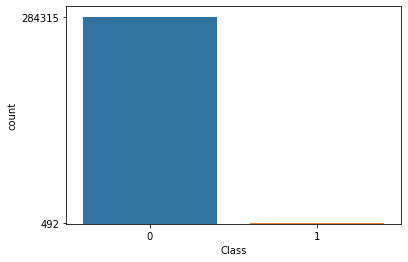

In [12]:
# to check data imbalance
sns.countplot(data = df,x="Class")
plt.yticks(df["Class"].value_counts())


In [13]:
# data is imbalance then use sampling technique
# balance the unbalance data 
#!pip install imblearn

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
# use random over sampler for the data balance
ros = RandomOverSampler(random_state = 1)

In [16]:
#fit_resample() inbuit method of randomoversampler class
X_train_ros,Y_train_ros = ros.fit_resample(X_train,Y_train)

In [17]:
pd.Series(Y_train).value_counts() # if check data is balance is not

0    199007
1       357
Name: Class, dtype: int64

In [18]:
pd.Series(Y_train_ros).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [19]:
# apply random over sampling on 30% data
X_test_ros,Y_test_ros = ros.fit_resample(X_test,Y_test)

In [20]:
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [21]:
pd.Series(Y_test_ros).value_counts()# data is balance

0    85308
1    85308
Name: Class, dtype: int64

In [22]:
# create function
def create_model(model):
  model.fit(X_train_ros,Y_train_ros)# train the model
  Y_pred = model.predict(X_test_ros)
  print(classification_report(Y_test_ros,Y_pred))
  print("Confusion Matrix:")
  ## confusion matrix
  print(confusion_matrix(Y_test_ros,Y_pred))
  return model

In [23]:
# import class
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Logistic Regression **


In [24]:
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)
from sklearn.linear_model import LogisticRegression

In [25]:
# create the object of logisticregression class
lr = LogisticRegression()

In [26]:
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix:
[[83724  1584]
 [ 8874 76434]]


In [27]:
# decicson tree algo

**DecisionTreeClassifier:**

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# create object
dt = DecisionTreeClassifier()

In [30]:
# call function
dt = create_model(dt)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     85308
           1       1.00      0.68      0.81     85308

    accuracy                           0.84    170616
   macro avg       0.88      0.84      0.84    170616
weighted avg       0.88      0.84      0.84    170616

Confusion Matrix:
[[85273    35]
 [27341 57967]]


In [31]:
# lets acheck importnat inputs

In [32]:
IG = dt.feature_importances_

In [33]:
print(IG)

[1.40600205e-02 6.80085801e-04 2.03485045e-03 1.06906449e-03
 4.40603516e-02 7.10003707e-03 1.55932010e-03 1.24146989e-02
 1.07776538e-02 5.02526420e-03 3.83329468e-02 1.96911033e-03
 2.45496948e-02 1.57079912e-02 7.41971133e-01 4.01779186e-05
 1.30092756e-03 6.40124942e-03 1.97120432e-03 1.11219560e-02
 1.80358296e-02 1.75643481e-03 5.65184768e-03 5.99858364e-03
 1.78566402e-04 4.86070376e-04 5.78164604e-03 5.13286789e-03
 4.15626252e-03 1.06741524e-02]


In [34]:
columns=X.columns

In [35]:
dic = {"inpput":columns,"information_gain":IG}
df1 = pd.DataFrame(dic)

In [36]:
df1.sort_values("information_gain",ascending=False)

,inpput,information_gain
14,V14,0.741971
4,V4,0.044060
10,V10,0.038333
12,V12,0.024550
20,V20,0.018036
13,V13,0.015708
0,Time,0.014060
7,V7,0.012415
19,V19,0.011122
8,V8,0.010778


In [37]:
from sklearn import tree

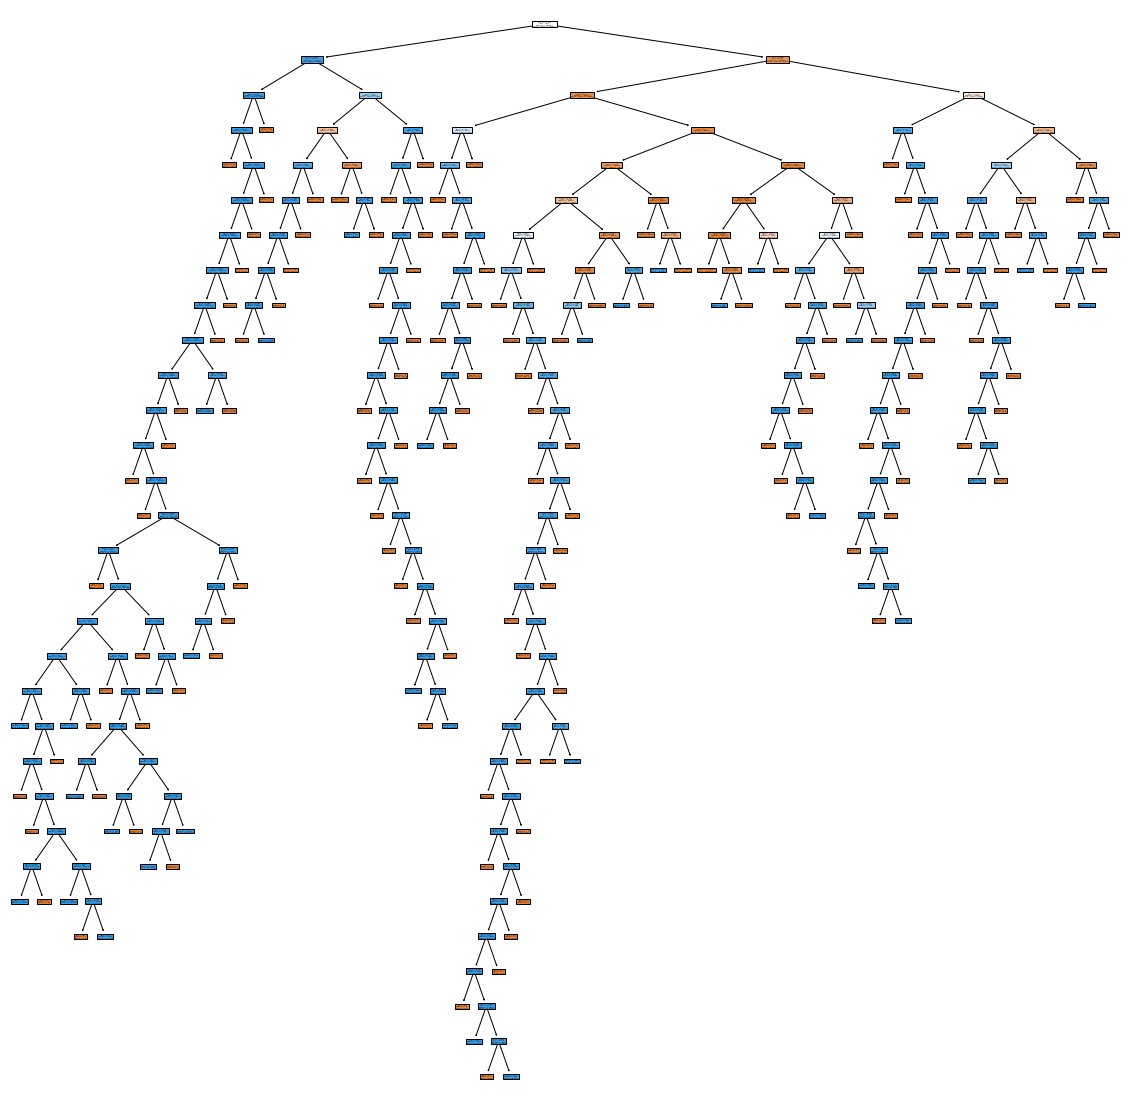

In [38]:
features = X.columns
fig = plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled= True)

In [39]:
# purning technique

**MaxDepth**

In [40]:
dt1 = DecisionTreeClassifier(max_depth=5)

In [41]:
# train model
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     85308
           1       0.99      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix:
[[84721   587]
 [14597 70711]]


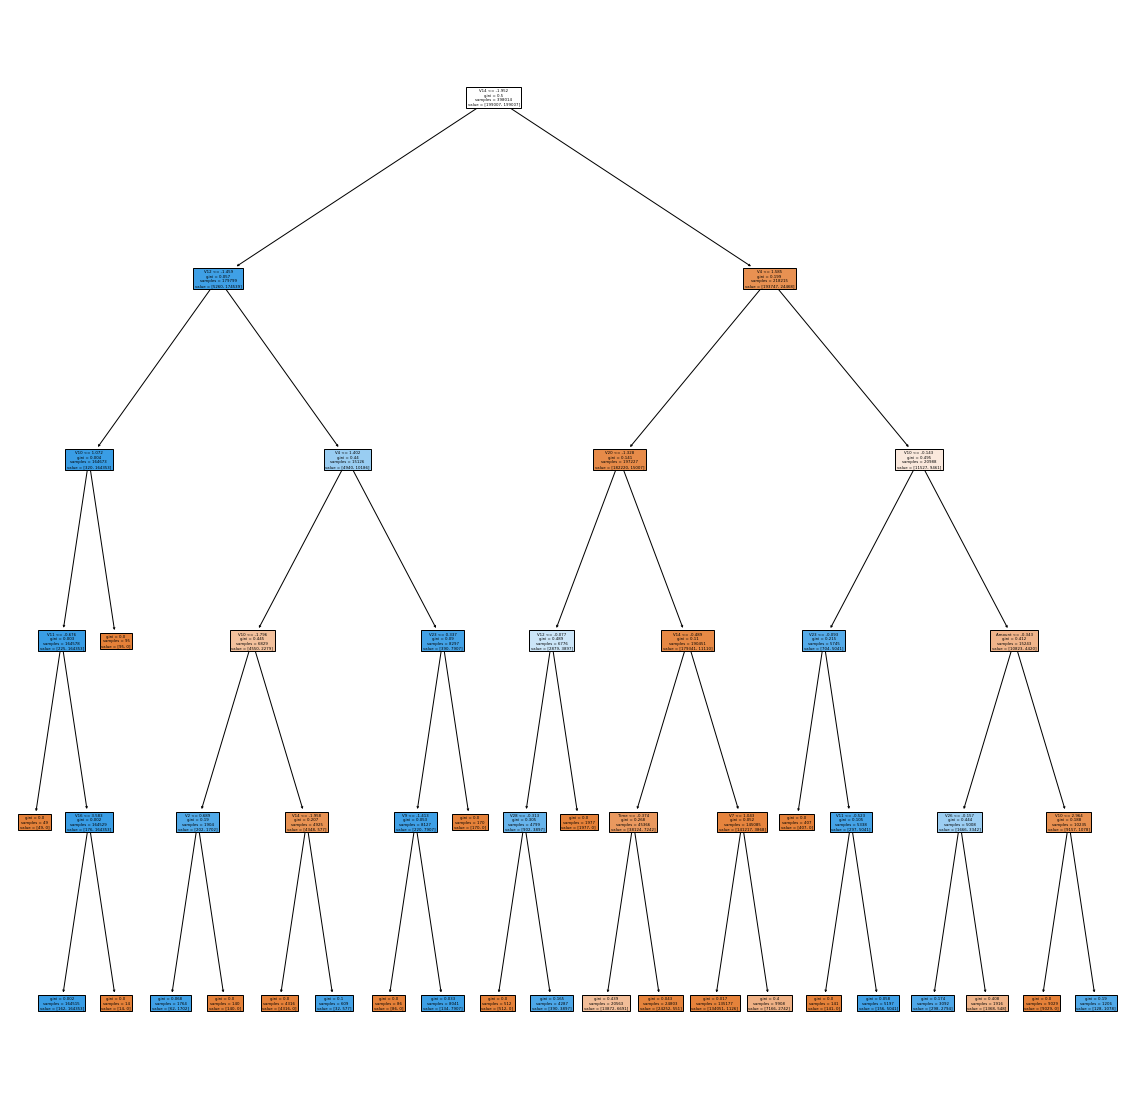

In [42]:
features = X.columns
fig = plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled= True)

In [43]:
# check important input featrues
IG2 = dt1.feature_importances_
print(IG)

[1.40600205e-02 6.80085801e-04 2.03485045e-03 1.06906449e-03
 4.40603516e-02 7.10003707e-03 1.55932010e-03 1.24146989e-02
 1.07776538e-02 5.02526420e-03 3.83329468e-02 1.96911033e-03
 2.45496948e-02 1.57079912e-02 7.41971133e-01 4.01779186e-05
 1.30092756e-03 6.40124942e-03 1.97120432e-03 1.11219560e-02
 1.80358296e-02 1.75643481e-03 5.65184768e-03 5.99858364e-03
 1.78566402e-04 4.86070376e-04 5.78164604e-03 5.13286789e-03
 4.15626252e-03 1.06741524e-02]


In [44]:
columns=X.columns

In [45]:
dic2 = {"inpput":columns,"information_gain":IG2}
df2 = pd.DataFrame(dic2)

In [46]:
df2.sort_values("information_gain",ascending=False)

,inpput,information_gain
14,V14,0.822454
4,V4,0.045712
10,V10,0.035828
12,V12,0.026575
20,V20,0.019484
29,Amount,0.011842
0,Time,0.011522
7,V7,0.007416
23,V23,0.005518
26,V26,0.005031


In [47]:
# 2nd purning technique


**Min_samples_leaf**

In [48]:
# create object
dt2 = DecisionTreeClassifier(min_samples_leaf=30)

In [49]:
# call fucntion
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616

Confusion Matrix:
[[85181   127]
 [17706 67602]]


In [50]:
IG3 = dt2.feature_importances_
print(IG3)

[1.40294627e-02 1.67957995e-08 1.86087138e-03 8.81113296e-04
 4.41846623e-02 7.10273546e-03 1.50386831e-03 1.21612093e-02
 1.07375966e-02 5.00894597e-03 3.77872604e-02 1.80801401e-03
 2.47116039e-02 1.55003311e-02 7.43727309e-01 1.27675027e-06
 1.03149323e-03 6.15766678e-03 2.43506550e-03 1.11199001e-02
 1.83070936e-02 2.11493557e-03 5.51186585e-03 5.80373325e-03
 4.71272240e-07 1.07490814e-03 5.38852077e-03 5.16056293e-03
 4.15765685e-03 1.07298490e-02]


** RandomForestClassifier :**

In [51]:
# ensembling technique

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# create obejct
rfc = RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)

In [54]:
# create model
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     85308
           1       1.00      0.74      0.85     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

Confusion Matrix:
[[85300     8]
 [22331 62977]]


AdaBoostClassifier :

In [55]:
# apply adaboost on given
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada = AdaBoostClassifier(n_estimators=10)

In [57]:
# call fucntion
ada = create_model(ada)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85308
           1       0.96      0.90      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix:
[[81925  3383]
 [ 8199 77109]]


In [58]:
# gradient classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier(n_estimators=21,random_state=1)

In [61]:
# call fucntion
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.86      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix:
[[84432   876]
 [11955 73353]]


In [62]:
#!pip install xgboost

In [63]:
from xgboost import XGBClassifier


In [64]:
# create object
XGC = XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)

In [65]:
XGC = create_model(XGC)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85308
           1       0.99      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix:
[[84684   624]
 [13244 72064]]


In [66]:
#apply knn algo

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# create object
knc = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)

In [69]:
# call function
knc = create_model(knc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Confusion Matrix:
[[85247    61]
 [19106 66202]]


In [70]:
#SVC

In [75]:
from sklearn.svm import LinearSVC 

In [72]:
# create object

In [76]:
svc = LinearSVC(random_state =1) # by default hard margin

In [77]:

svc = create_model(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

Confusion Matrix:
[[83865  1443]
 [10100 75208]]


In [78]:
# to check whether we can get better accuracy by adding error:soft margin
svc = LinearSVC(random_state=1,C=0.5)

In [80]:
svc = create_model(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

Confusion Matrix:
[[83905  1403]
 [10100 75208]]


**Conclusion** : From the above method performance and the Accuracy gained from the model performing, it is concluded that best model to gain accuracy and correct prediction is through LogisticRegression, AdaBoostCassifier, GradientBoostingClassifier and LinearSVC.